In [118]:
from typing import Optional, Dict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

class Metric:
    name: str
    abbreviation: str
    unit: Optional[str]

    def __init__(self, name: str, abbreviation: str, unit: Optional[str]) -> None:
        self.name = name
        self.abbreviation = abbreviation
        self.unit = unit

    def __str__(self) -> str:
        base = f"{self.name} ({self.abbreviation})"

        if self.unit:
            return f"{base} [{self.unit}]"
        else:
            return base


APPLICATION = "postgresql-ha"
EXPERIMENTS = {
    "ct": "Control Test",
    "pd": "Perturbation Disabled",
    "vb": "Vary build",
    "vp": "Vary patch",
    "vm": "Vary Minor",
}
METRICS: Dict[str, Metric] = {
    "time_to_initialize": Metric(
        name="Time to Complete Initialization",
        abbreviation="TCI",
        unit="s",
        ),
    "time_to_first_request": Metric(
        name="Time to First Request",
        abbreviation="TFR",
        unit="s",
    ),
    "time_to_all_requests": Metric(
        name="Time to All Containers Handle Requests",
        abbreviation="TACHR",
        unit="s",
    ),
    "restarts": Metric(
        name="Amount of Container Restarts",
        abbreviation="ACR",
        unit=None,
    ),
}

In [96]:
# Read all datafiles as separate DataFrames
dfs = {
    experiment: pd.read_json(f"{experiment}_{APPLICATION}.jsonl", lines=True)
    for experiment in EXPERIMENTS.keys()
}

# Combine all DataFrames
df = pd.concat(dfs, names=["experiment"])

# Adds the experiment index as a column
df.reset_index(level=0, inplace=True)

df["experiment_name"] = df["experiment"].apply(lambda x: EXPERIMENTS[x])

# Display the data loaded
df

,experiment,start_time,time_to_initialize,time_to_first_request,time_to_all_requests,restarts,end_time,experiment_name
0,ct,2020-08-10 14:05:56.242291927,78.602810,45.747801,70.021016,0,2020-08-10 14:07:15.298298836,Control Test
1,ct,2020-08-10 14:14:43.314725161,45.677756,27.764674,34.111991,0,2020-08-10 14:15:29.429429054,Control Test
2,ct,2020-08-10 14:22:17.197078943,68.845743,42.068355,68.319220,0,2020-08-10 14:23:26.447458982,Control Test
3,ct,2020-08-10 14:29:47.296878099,65.700319,38.411755,61.599261,0,2020-08-10 14:30:53.454533815,Control Test
4,ct,2020-08-10 14:37:04.917234898,53.025109,24.400544,34.525423,0,2020-08-10 14:37:58.422300816,Control Test
...,...,...,...,...,...,...,...,...
10,vm,2020-08-11 00:03:26.578637123,1252.318634,40.250844,264.640370,15,2020-08-11 00:24:19.328743935,Vary Minor
11,vm,2020-08-11 00:31:17.515824795,136.770135,39.712688,129.500411,7,2020-08-11 00:33:34.770613909,Vary Minor
12,vm,2020-08-11 00:40:20.825722933,1447.455548,206.052714,1446.940320,35,2020-08-11 01:04:28.698216915,Vary Minor
13,vm,2020-08-11 01:11:31.858479023,100.255906,44.689342,99.800744,5,2020-08-11 01:13:12.581374884,Vary Minor


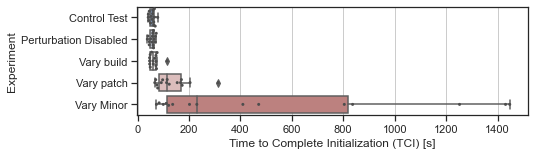

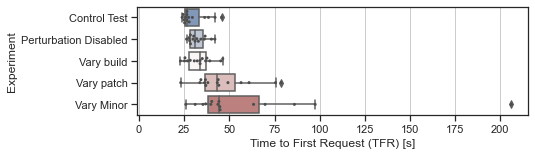

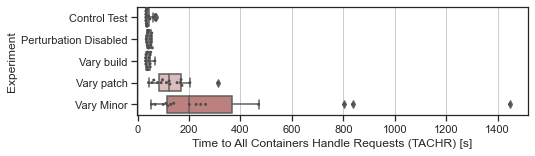

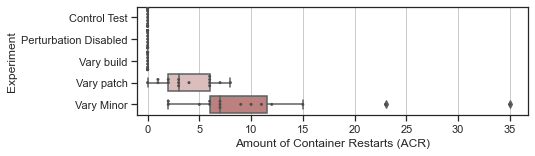

In [145]:
def show_boxplot(metric):
    f, ax = plt.subplots(figsize=(7, 2))

    sns.boxplot(data=df,
                x=metric,
                y="experiment_name",
                palette="vlag"
                )

    sns.swarmplot(data=df,
                  x=metric,
                  y="experiment_name",
                  size=3,
                  color=".3",
                  )

    sns.set(style="ticks")

    ax.xaxis.grid(True)
    ax.set_xlim(xmin=-1)
    ax.set_xlabel(METRICS[metric])
    ax.set_ylabel("Experiment")

for metric in METRICS.keys():
    show_boxplot(metric)

AttributeError: 'PathCollection' object has no property 'hue'

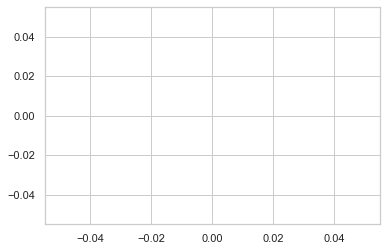